In [1]:
import numpy as np
from matplotlib import pyplot as plt
# plt.style.use('dark_background')

In [2]:
w = np.loadtxt('throughput/contact-high-school/w.txt')
x = np.loadtxt('throughput/contact-high-school/x.txt')
w2 = np.loadtxt('throughput/contact-high-school/w2.txt')

In [9]:
d = w.sum(axis = 0).astype(int)
b = x.sum(axis = 0)
n = len(d)

In [10]:
B = np.zeros((n, int(d.max())))
B[np.arange(n), d-1] = 1
B = B[:,B.sum(axis = 0) > 0]

In [11]:
CL = np.outer(d, d)/d.sum()
np.fill_diagonal(CL, 0)

CL_ = np.outer(b, b)/b.sum()
np.fill_diagonal(CL_, 0)

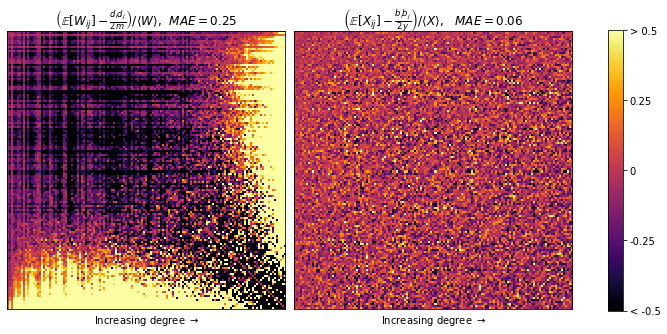

In [12]:
vmin = -.5
vmax = .5
cmap = 'inferno'

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)

err = (CL - w)/d.mean()*n 
v = np.mean(np.abs(err))
err = np.dot(np.dot(B.T, err), B)

im = ax1.imshow(err, cmap = cmap, vmin = vmin, vmax = vmax)

description = r"$\left(\mathbb{E}[W_{ij}] - \frac{d_id_j}{2m}\right) /\langle W \rangle$"
err = r"$MAE = $" + str(round(v, 2))

ax1.set(title = description + ',  ' + err,
        xlabel = r'Increasing degree $\rightarrow$')

ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)


ax2 = fig.add_subplot(122)
err = (CL_ - x) / x.mean()

v = np.mean(np.abs(err))
err = np.dot(np.dot(B.T, err), B)



im = ax2.imshow(err, cmap = cmap, vmin = vmin, vmax = vmax)

description = r"$\left(\mathbb{E}[X_{ij}] - \frac{b_ib_j}{2y}\right)/\langle X \rangle$"
err = r"$MAE = $" + str(round(v, 2))



ax2.set(title = description + ',   ' + err,
        xlabel = r'Increasing degree $\rightarrow$')

ax2.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    right=False,
    left=False,
    labelbottom=False,
    labelleft=False,
    length = 0)


plt.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.02, 0.78])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[vmin, vmin/2, 0, vmax/2, vmax])

cbar.ax.set_yticklabels(['< ' + str(vmin), str(vmin/2), '0' , str(vmax/2), '> ' + str(vmax)])  # vertically oriented colorbar


plt.savefig('../../Downloads/error_matrices.png')

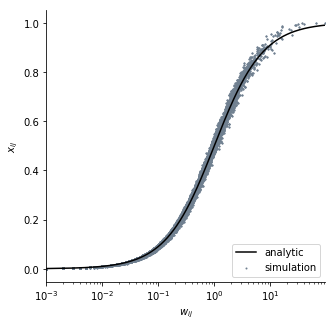

In [66]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.scatter(w.ravel(), 
           x.ravel(), 
           s = 1, 
           label = 'simulation', 
           color = 'slategrey', 
           alpha = 1)
ax.semilogx()


X = np.linspace(w.min(), w.max(), 100000)
Y = X/(1+X)
ax.plot(X, Y, color = 'black', label = 'analytic')

ax.set(xlim = (w.min() + .001, w.max()),
       xlabel = r'$w_{ij}$',
       ylabel = r'$x_{ij}$')
ax.legend(loc = 'lower right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig('../../Downloads/x_vs_w.png')

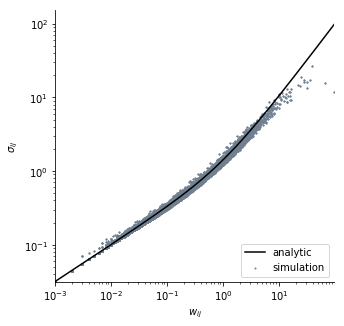

In [72]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
sig = np.sqrt(w2.ravel() - (w**2).ravel())
ax.scatter(w.ravel(), 
           sig, 
           s = 1, 
           label = 'simulation', 
           color = 'slategrey', 
           alpha = 1)
ax.loglog()

X = np.linspace(w.min(), w.max(), 1000000)

# ax.plot(X, Y, color = 'darkred', label = 'analytic')



# X = np.sort(w.ravel())
Y = np.sqrt(X*(X+1))
# Y = w.ravel()/(1-x.ravel())
plt.plot(np.sort(X),np.sort(Y), label = 'analytic', color = 'black')

ax.set(xlim = (w[w>0].min(), w.max()),
       ylim = (sig[sig>0].min(), None),
        xlabel = r'$w_{ij}$',
       ylabel = r'$\sigma_{ij}$')
ax.legend(loc = 'lower right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig('../../Downloads/var_vs_w.png')

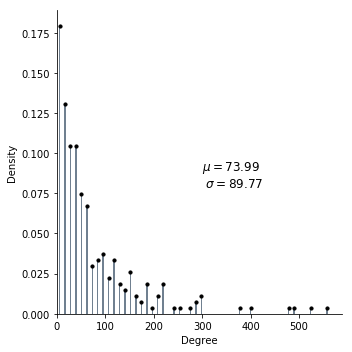

In [73]:
X, Y = np.histogram(d, bins = 50)
X = X/X.sum()
Y = Y[1:] - (Y[1] - Y[0])/2

Y = Y[X>0]
X = X[X > 0]

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar(Y, X, color = 'slategrey', width = 3)
ax.scatter(Y, X, color = 'black', zorder=10, s = 10)
ax.set(ylim = (0, None),
       xlim = (0, None),
       xlabel = "Degree", 
       ylabel = "Density")



mu = d.mean()
sigma = np.sqrt(((d**2).mean() - d.mean()**2))

ax.text(300, .08, 
        r'$\mu = $' + str(round(mu, 2)) + '\n' + r' $\sigma = $' + str(round(sigma,2)),
        fontsize = 12)

plt.tight_layout()

plt.savefig('../../Downloads/degree_distribution.png')